# Bibliotecas

In [1]:
# Data manipulation

import pandas as pd
import numpy as np

# Data viz

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Obtenção dos dados

In [2]:
# !kaggle datasets download -d parisrohan/credit-score-classification

# 2. Importação dos dados

In [3]:
train = pd.read_csv('data/train.csv', low_memory=False)

In [4]:
pd.set_option('display.max_columns', None)

# 3. Inspeção geral dos dados

| Variável                  | Descrição                                                                 |
|---------------------------|---------------------------------------------------------------------------|
| ID                        | Identificador único da transação ou registro                               |
| Customer_ID               | Identificador único do cliente                                             |
| Month                     | Mês de referência da análise                                               |
| Name                      | Nome do cliente                                                            |
| Age                       | Idade do cliente                                                           |
| SSN                       | Número de Segurança Social (Social Security Number)                        |
| Occupation                | Ocupação profissional do cliente                                           |
| Annual_Income             | Renda anual do cliente                                                     |
| Monthly_Inhand_Salary      | Salário mensal                                       |
| Num_Bank_Accounts          | Número de contas bancárias que o cliente possui                           |
| Num_Credit_Card            | Número de cartões de crédito que o cliente possui                         |
| Interest_Rate              | Taxa de juros aplicada aos empréstimos ou dívidas                         |
| Num_of_Loan                | Número de empréstimos que o cliente possui                                |
| Type_of_Loan               | Tipo de empréstimo (pessoal, hipotecário, etc.)                           |
| Delay_from_due_date        | Atraso em dias no pagamento após a data de vencimento                     |
| Num_of_Delayed_Payment     | Número de pagamentos atrasados                                             |
| Changed_Credit_Limit       | Alteração no limite de crédito                                             |
| Num_Credit_Inquiries       | Número de consultas de crédito feitas por instituições                    |
| Credit_Mix                 | Mistura de tipos de crédito (cartões, empréstimos, etc.)                  |
| Outstanding_Debt           | Dívida pendente do cliente                                                |
| Credit_Utilization_Ratio   | Proporção da utilização do crédito disponível                             |
| Credit_History_Age         | Tempo total de histórico de crédito do cliente                            |
| Payment_of_Min_Amount      | Se o cliente paga o valor mínimo da fatura (Sim/Não)                      |
| Total_EMI_per_month        | Valor da parcela paga todos os meses para um empréstimo ou financiamento                              |
| Amount_invested_monthly    | Quantia investida mensalmente pelo cliente                                |
| Payment_Behaviour          | Comportamento de pagamento (padrões e hábitos)                            |
| Monthly_Balance            | Saldo mensal disponível após todas as despesas                            |
| Credit_Score               | Pontuação de crédito do cliente                                           |
| target                     | Variável alvo ou de interesse criada a partir da variável |


In [5]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


Para deixar o problema ainda mais próximo da área de crédito, optou-se por modificar as classes da seguinte maneira:

* Clientes classificados como `Poor` &#x27A1; `Classe 1` (maus pagadores)
* Clientes classifiados como `Standard` &#x27A1; `Classe 0` (bons pagadores)
* Clientes classifiados como `Good` &#x27A1; `Classe 0` (bons pagadores)

In [6]:
# Antes da modificação

train['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [7]:
# Modificando as classes para bons e maus pagadores

train['target'] = train['Credit_Score'].apply(lambda x: 1 if x == 'Poor' else 0)

In [8]:
train = train.drop('Credit_Score', axis=1)

In [9]:
# Checando as novas classes

train['target'].value_counts()

target
0    71002
1    28998
Name: count, dtype: int64

In [10]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,target
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,0
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,0
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,0
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,0
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,0


In [11]:
# Verificando a dimensionalidade dos dados

print(f'Total de linhas: {train.shape[0]}')
print(f'Total de colunas: {train.shape[1]}')

Total de linhas: 100000
Total de colunas: 28


In [12]:
# Colunas que restaram

train.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'target'],
      dtype='object')

# 4. EDA

## 4.1 Análises gerais

In [13]:
# Checando a proporção das classes

train['target'].value_counts(normalize=True,dropna=False)

target
0    0.71002
1    0.28998
Name: proportion, dtype: float64

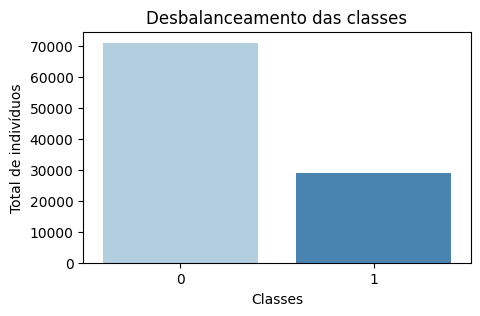

In [14]:
plt.figure(figsize=(5,3))
sns.countplot(x=train['target'], hue=train['target'], palette='Blues', legend=False)

plt.title('Desbalanceamento das classes')
plt.xlabel('Classes')
plt.ylabel('Total de indivíduos')
plt.show()

Percebe-se, analisando o gráfico acima, que os dados estão desbalanceados (o que já era esperado), com mais indivíduos bons pagadores do que maus pagadores. Para corrigir esse desbalanceamento, utilizaremos o parâmetro class_weight nos modelos, além de técnicas de escalonamento (scales) que ajudarão a normalizar o target, garantindo que o modelo não seja enviesado para a classe majoritária.

## 4.2 Analisando as variáveis categóricas

### 4.2.1. Total de clientes únicos (col `Customer_ID` e `SSN`)

📝 Identificador único do cliente  
📝 Número de Segurança Social (Social Security Number)

In [15]:
# Dados ausentes

train['Customer_ID'].isna().sum()

np.int64(0)

In [16]:
train['Customer_ID'].nunique()

12500

In [17]:
# Dados ausentes

train['SSN'].isna().sum()

np.int64(0)

In [18]:
train['SSN'].nunique()

12501

Total de clientes únicos: 12.500

### 4.2.2 Total de transações (col `ID`)

📝 Identificador único da transação ou registro

In [19]:
# Dados ausentes

train['ID'].isna().sum()

np.int64(0)

In [20]:
train['ID'].nunique()

100000

### 4.2.3 Análise das safras (col `Month`)

📝 Mês de referência da análise

In [21]:
# Dados ausentes

train['Month'].isna().sum()

np.int64(0)

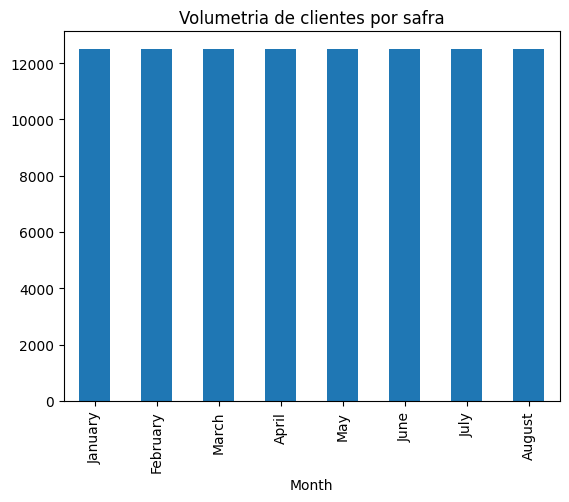

In [22]:
# Volumetria por safra

train['Month'].value_counts().plot(kind='bar');
plt.title('Volumetria de clientes por safra');

Não foi percebida nenhuma variação na volumetria de clientes por safra (mês). Isso indica que os 12.500 clientes estavam presentes em todos os meses acima.

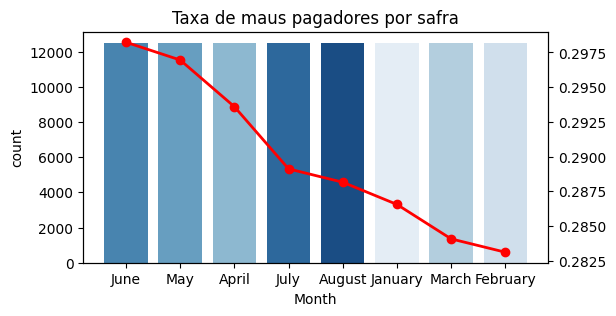

In [23]:
# Taxa de maus por safra

tx_maus_safra = train.groupby(['Month'])['target'].mean().sort_values(ascending=False)

fig, ax1 = plt.subplots(figsize=(6, 3))

# Gráfico de barras para contagem de pessoas
sns.countplot(data=train, x='Month', ax=ax1, palette='Blues', hue='Month', order=tx_maus_safra.index)

# Configurando o segundo eixo y
ax2 = ax1.twinx()
ax2.plot(tx_maus_safra.index, tx_maus_safra.values, color='r', marker='o', linestyle='-', linewidth=2)
plt.title('Taxa de maus pagadores por safra')
plt.show()

Analisando o gráfico acima, percebe-se que o mês de fevereiro apresentou a menor taxa de maus pagadores, enquanto obteve a maior taxa no mês de junho. No entanto, a diferença entre a menor e maior taxa foi apenas de 1%.

### 4.2.4 Taxa de maus por nome não preenchido (col `Name`)

📝 Nome do cliente

In [24]:
# Dados ausentes

train['Name'].isna().sum()

np.int64(9985)

In [25]:
# Criando a flag. OBS: Sem nome preenchido = 1

flag_nome = train['Name'].isna()*1
flag_nome = pd.concat([flag_nome,train['target']], axis=1)

In [26]:
# Taxa de maus por nomes não preenchidos 

tx_maus_nome = flag_nome.groupby(['Name'])['target'].mean().sort_values(ascending=False)

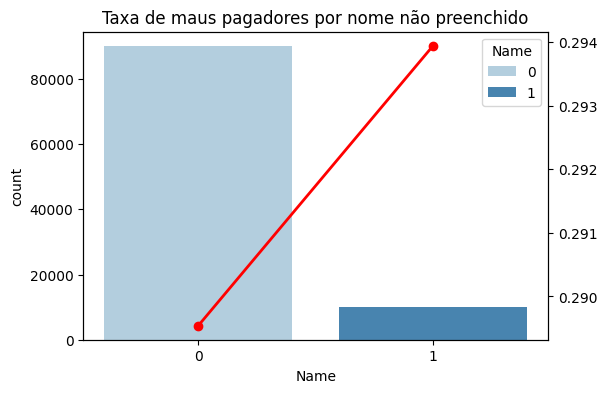

In [27]:
# Gráfico

fig, ax1 = plt.subplots(figsize=(6, 4))

# Gráfico de barras para a contagem de clientes

sns.countplot(data=flag_nome, x='Name', ax=ax1, palette='Blues', hue='Name')

# Configurando o segundo eixo y

plt.title('Taxa de maus pagadores por nome não preenchido')
ax2 = ax1.twinx()
ax2.plot(tx_maus_nome.index, tx_maus_nome.values, color='r', marker='o', linestyle='-', linewidth=2)
plt.show()

In [28]:
tx_maus_nome 

Name
1    0.293941
0    0.289541
Name: target, dtype: float64

Percebeu-se, acima, que a taxa de maus é um pouco maior em clientes sem nome cadastrado. No entanto, a diferença é pequena (1%).

### 4.2.5 Taxa de maus pagadores por ocupação (col `Occupation`)

📝 Ocupação profissional do cliente

In [29]:
# Dados ausentes

train['Occupation'].isna().sum()

np.int64(0)

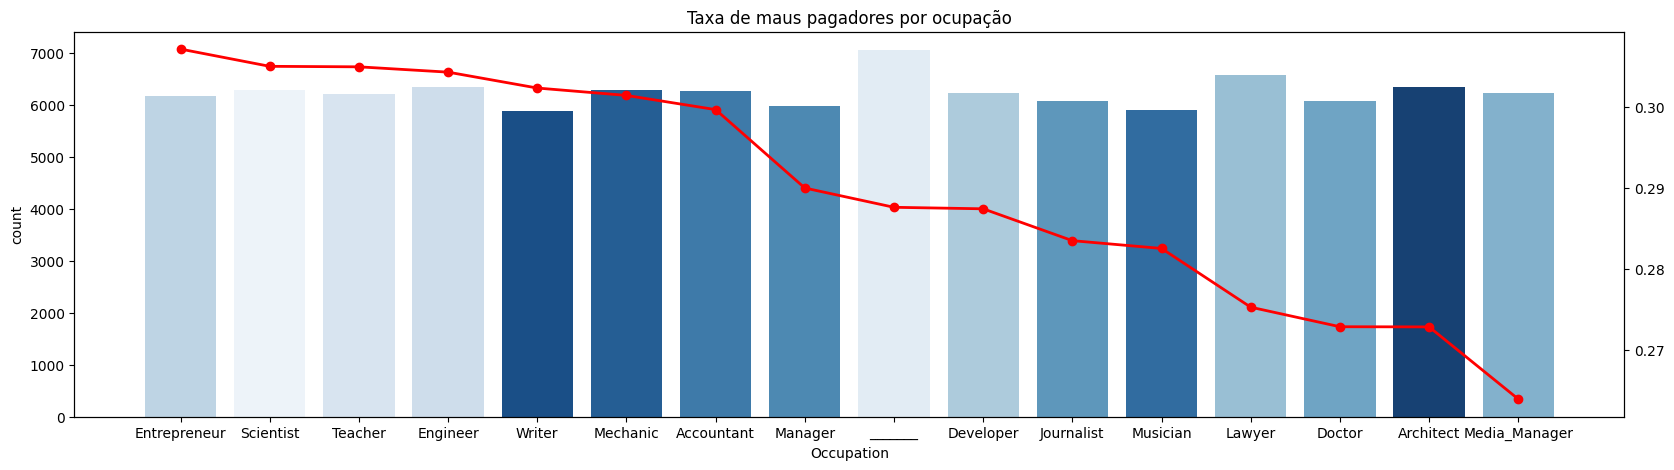

In [30]:
# Taxa de maus por ocupação

tx_maus_ocupacao = train.groupby(['Occupation'])['target'].mean().sort_values(ascending=False)

# Gráfico

fig, ax1 = plt.subplots(figsize=(20, 5))

# Gráfico de barras para contagem de pessoas
sns.countplot(data=train, x='Occupation', ax=ax1, palette='Blues', hue='Occupation', order=tx_maus_ocupacao.index)

# Configurando o segundo eixo y
ax2 = ax1.twinx()
ax2.plot(tx_maus_ocupacao.index, tx_maus_ocupacao.values, color='r', marker='o', linestyle='-', linewidth=2)
plt.title('Taxa de maus pagadores por ocupação')
plt.show()

In [31]:
print(f'Maior taxa de maus: {np.round(tx_maus_ocupacao,2).max()}')
print(f'Menor taxa de maus: {np.round(tx_maus_ocupacao,2).min()}')

Maior taxa de maus: 0.31
Menor taxa de maus: 0.26


A taxa de maus por ocupação varia pouco (diferença de 4%). Em todo caso, percebeu-se que _Media manager_ foi o que apresentou a menor taxa de maus pagadores, com 26%. Já a maior taxa ficou com _Entrepreneur_, com 31%.

### 4.2.6 Verificando a taxa de maus por tipo de empréstimo (col `Type_of_Loan` )

📝 Tipo de empréstimo (pessoal, hipotecário, etc)

Percebeu-se, abaixo, que a variável contém bastante texto e que possui várias categorias de empréstimo, algumas vezes combinados. Uma pergunta válida seria: Há uma maior chance de pessoas com mais tipos de empréstimos serem, em maioria, maus pagadores?

In [32]:
# Dados ausentes

train['Type_of_Loan'].isna().sum()

np.int64(11408)

In [33]:
train_type_of_loan = train[['Type_of_Loan','target']]

In [34]:
train_type_of_loan.sample(10)

,Type_of_Loan,target
49711,"Payday Loan, Not Specified, and Credit-Builder...",0
51208,"Personal Loan, Credit-Builder Loan, and Debt C...",0
95340,Auto Loan,0
88801,"Student Loan, Auto Loan, Auto Loan, Mortgage L...",1
44749,"Payday Loan, Auto Loan, Debt Consolidation Loa...",0
15663,Not Specified,0
32793,"Payday Loan, Debt Consolidation Loan, Mortgage...",0
57062,"Debt Consolidation Loan, Credit-Builder Loan, ...",0
13032,"Debt Consolidation Loan, Credit-Builder Loan, ...",0
32696,"Payday Loan, Home Equity Loan, Auto Loan, and ...",0


💡 Ideia para trabalhar com essa variável:
* Passar tudo para minúsculo
* Separá-los pela vírgula
* Quantificar os tipos de empréstimo
* Calcular a taxa de maus por tipo de empréstimo
* Transformar cada tipo em uma coluna (?)

In [35]:
# Passando tudo pra minúsculo

train_type_of_loan.loc[:, 'Type_of_Loan'] = train_type_of_loan['Type_of_Loan'].str.lower()

# Exibir todos os empréstimos da linha

pd.set_option('display.max_colwidth', None)

# Tratamento do separador

train_type_of_loan.loc[:, 'Type_of_Loan'] = train_type_of_loan['Type_of_Loan'].str.replace(' and ', ',')
train_type_of_loan.loc[:, 'Type_of_Loan'] = train_type_of_loan['Type_of_Loan'].str.replace(', ', ',')
train_type_of_loan.loc[:, 'Type_of_Loan'] = train_type_of_loan['Type_of_Loan'].str.replace(',,', ',')

# Separação dos empréstimos

exploded = train_type_of_loan.assign(Type_of_Loan=train_type_of_loan['Type_of_Loan'].str.split(','))\
.explode('Type_of_Loan')

#Remoção de espaços em branco extras nas strings

exploded['Type_of_Loan'] = exploded['Type_of_Loan'].str.strip()

In [36]:
# Quantificação dos tipos de empréstimo

df_loan_counts = train_type_of_loan['Type_of_Loan'].str.split(',').explode().str.strip().value_counts()
df_loan_counts

Type_of_Loan
payday loan                40568
credit-builder loan        40440
not specified              39616
home equity loan           39104
student loan               38968
mortgage loan              38936
personal loan              38888
debt consolidation loan    38776
auto loan                  37992
Name: count, dtype: int64

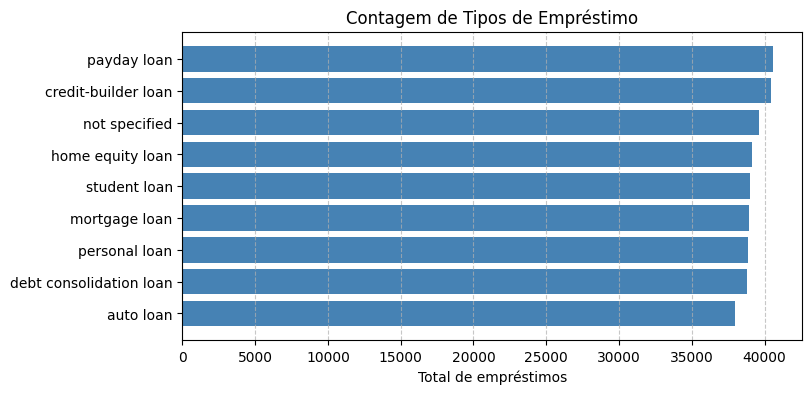

In [37]:
# Configurações do dataframe

df_loan_counts = pd.DataFrame(df_loan_counts).reset_index()
df_loan_counts = df_loan_counts.sort_values(by='count', ascending=True)

# Gráfico

plt.figure(figsize=(8, 4))
plt.barh(df_loan_counts['Type_of_Loan'], df_loan_counts['count'], color='steelblue')
plt.xlabel('Total de empréstimos')
plt.title('Contagem de Tipos de Empréstimo')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [38]:
# Taxa de maus por categoria 

maus_por_categoria = exploded.groupby('Type_of_Loan')['target'].mean()
maus_por_categoria

Type_of_Loan
auto loan                  0.394030
credit-builder loan        0.387364
debt consolidation loan    0.393130
home equity loan           0.387531
mortgage loan              0.390718
not specified              0.387369
payday loan                0.392428
personal loan              0.385800
student loan               0.394991
Name: target, dtype: float64

Verificou-se, acima, que a taxa de maus não varia tanto pelo tipo de empréstimo, variando apenas em 1%. O único fator interessante a se comentar é com relação aos top 3 empréstimos mais solicitados:

**(1): payday loan**: empréstimo de dia de pagamento  
**(2): credit-builder loan**: empréstimo para construção de crédito  
**(3): not specified / home equity loan**: não especificado / empréstimo com garantia de imóvel

### 4.2.7 Verificando a taxa de maus por variedade de tipos de crédito (col `Credit_Mix` )

📝 Mistura de tipos de crédito (cartões, empréstimos, etc)

Essa feature corresponde a uma variedade de tipos de crédito, como cartões de crédito, empréstimos pessoais, e outros. Um "Good" Credit_Mix indica uma combinação saudável de diferentes tipos de crédito, enquanto "Bad" sugere um uso desfavorável.

In [39]:
# Dados ausentes

train['Credit_Mix'].isna().sum()

np.int64(0)

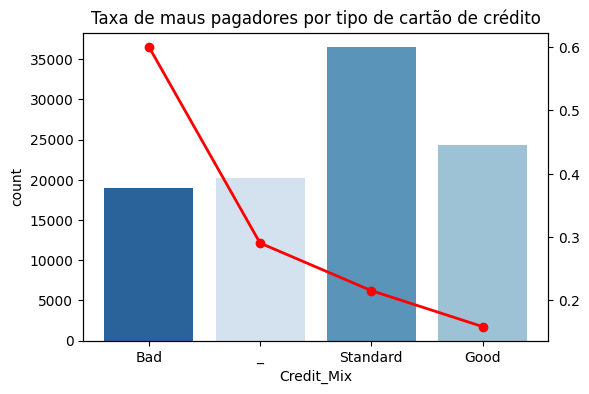

In [40]:
# Taxa de maus por variedade de empréstimo

tx_maus_credit_mix = train.groupby(['Credit_Mix'])['target'].mean().sort_values(ascending=False)

# Gráfico

fig, ax1 = plt.subplots(figsize=(6, 4))

# Gráfico de barras para contagem de pessoas
sns.countplot(data=train, x='Credit_Mix', ax=ax1, palette='Blues', hue='Credit_Mix',order=tx_maus_credit_mix.index)

# Configurando o segundo eixo y
ax2 = ax1.twinx()
ax2.plot(tx_maus_credit_mix.index, tx_maus_credit_mix.values, color='r', marker='o', linestyle='-', linewidth=2)
plt.title('Taxa de maus pagadores por tipo de cartão de crédito')
plt.show()

In [41]:
tx_maus_credit_mix

Credit_Mix
Bad         0.600822
_           0.290616
Standard    0.215439
Good        0.158647
Name: target, dtype: float64

Percebeu-se que pessoas com uma má/baixa variedade de crédito apresentou uma alta taxa de inadimplência (60%), enquanto pessoas boas apresentaram apenas 15% (algo esperado). Ou seja, há um diferença de 45% na taxa de maus.

In [42]:
# Pode estar relacionada com a variável acima (Type of loan)

### 4.2.8 Analisando o histórico de crédito dos clientes (col `Credit_History_Age`)

📝 Tempo total de histórico de crédito do cliente

In [43]:
# Dados ausentes

train['Credit_History_Age'].isna().sum()

np.int64(9030)

A variável abaixo apresenta o tempo total de permanência do cliente a partir da concessão de crédito. Nesse caso, optou-se por substituí-la pelo total de meses, para garantir uma melhor padronização da análise e possível performance do modelo (Será adicionada nos dados de treino na etapa de `Feature engineering`).

In [44]:
train['Credit_History_Age'].value_counts(0)

Credit_History_Age
15 Years and 11 Months    446
19 Years and 4 Months     445
19 Years and 5 Months     444
17 Years and 11 Months    443
19 Years and 3 Months     441
                         ... 
0 Years and 3 Months       20
0 Years and 2 Months       15
33 Years and 7 Months      14
33 Years and 8 Months      12
0 Years and 1 Months        2
Name: count, Length: 404, dtype: int64

In [45]:
def convert_to_months(age):
    """Função para converter Years and months em meses"""

    if isinstance(age, str):
        years, months = age.split(' Years and ')
        return int(years) * 12 + int(months.split(' ')[0])
    else:
        return None
        
Credit_History_Age_Months = train['Credit_History_Age'].apply(convert_to_months)

A variável passou a ser analisada no próximo tópico da EDA, referente às análises numéricas (seção 4.3.2).

### 4.2.9 Taxa de maus pagadores por pagamento mínimo da fatura (col `Payment_of_Min_Amount`)

📝 Se o cliente paga o valor mínimo da fatura (Yes/No)

Pagar apenas o valor mínimo da fatura do cartão de crédito significa que o cliente está adiando o pagamento completo do saldo para o futuro. Ou seja, o cliente paga um valor reduzido (ex: uma pequena porcentagem do saldo total ou uma quantia fixa) da fatura atual, no entanto, o saldo restante (não pago) é transferido para o mês seguinte. Esse saldo continua a acumular juros, o que pode aumentar a dívida ao longo do tempo, podendo ser fortemente associada ao aumento da taxa de maus pagadores.

In [46]:
# Dados ausentes

train['Payment_of_Min_Amount'].isna().sum()

np.int64(0)

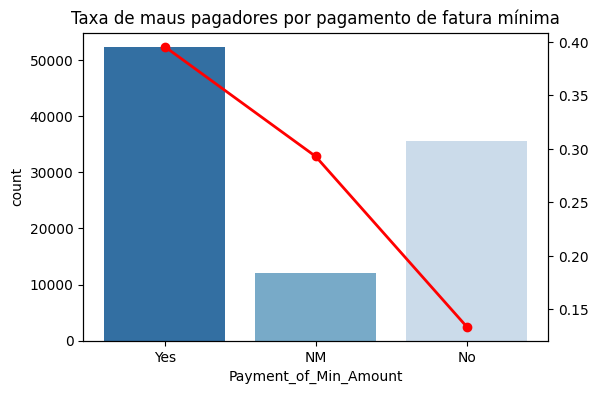

In [47]:
# Taxa de maus por pagamento mínimo da fatura

tx_maus_pay_min = train.groupby(['Payment_of_Min_Amount'])['target'].mean().sort_values(ascending=False)

# Gráfico

fig, ax1 = plt.subplots(figsize=(6, 4))

# Gráfico de barras para contagem de pessoas
sns.countplot(data=train, x='Payment_of_Min_Amount', ax=ax1, palette='Blues', hue='Payment_of_Min_Amount', order=tx_maus_pay_min.index)

# Configurando o segundo eixo y
ax2 = ax1.twinx()
ax2.plot(tx_maus_pay_min.index, tx_maus_pay_min.values, color='r', marker='o', linestyle='-', linewidth=2)
plt.title('Taxa de maus pagadores por pagamento de fatura mínima')
plt.show()

In [48]:
# Taxa de maus

np.round(tx_maus_pay_min,2)

Payment_of_Min_Amount
Yes    0.40
NM     0.29
No     0.13
Name: target, dtype: float64

* Houve uma diferença de 27% entre a maior e menor taxa de maus nessa variável;

* Observou-se acima que a taxa de maus é maior em pessoas que utilizam o recurso de pagamento do valor mínimo da fatura, como o esperado, pois o adiamento da dívida com juros mais alto aumenta ainda mais as chances de inadimplência;

* Também foi possível analisar que a taxa de maus é menor em pessoas que não utilizam esse recurso, também como o esperado.

### 4.2.10 Verificando abaixo os perfis de pagamento dos clientes (col `Payment_Behavior`)

📝 Comportamento de pagamento (padrões e hábitos)

In [49]:
train['Payment_Behaviour'].isna().sum()

np.int64(0)

In [50]:
train['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

* High_spent_Small_value_payments: Altos gastos em pagamentos de pequeno valor

* Low_spent_Large_value_payments: Baixos gastos em pagamentos de alto valor, sugerindo uma abordagem cuidadosa em grandes transações

* Low_spent_Medium_value_payments: Baixos gastos em pagamentos de valor médio

* Low_spent_Small_value_payments: Baixos gastos em pagamentos de pequeno valor

* High_spent_Medium_value_payments: Altos gastos em pagamentos de valor médio

* !@9#%8: Valor inválido ou outlier

* High_spent_Large_value_payments: Altos gastos em pagamentos de alto valor

#### Taxa de maus por perfil de pagamento

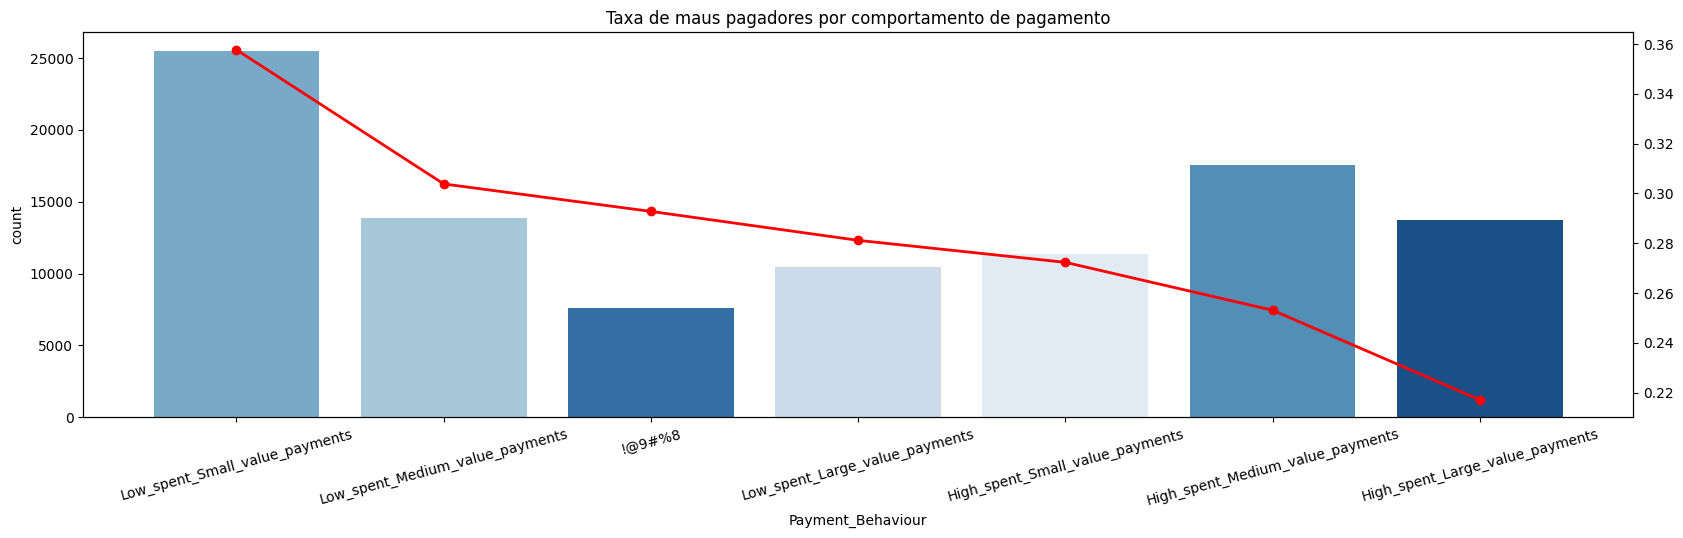

In [51]:
# Taxa de maus por comportamento de pagamento

tx_maus_pagamento = train.groupby(['Payment_Behaviour'])['target'].mean().sort_values(ascending=False)

# Gráfico

fig, ax1 = plt.subplots(figsize=(20, 5))

# Gráfico de barras para contagem de pessoas
sns.countplot(data=train, x='Payment_Behaviour', ax=ax1, palette='Blues', hue='Payment_Behaviour', order=tx_maus_pagamento.index)
plt.xticks(rotation=15)

# Configurando o segundo eixo y
ax2 = ax1.twinx()
ax2.plot(tx_maus_pagamento.index, tx_maus_pagamento.values, color='r', marker='o', linestyle='-', linewidth=2)
plt.title('Taxa de maus pagadores por comportamento de pagamento')
plt.show()

In [52]:
np.round(tx_maus_pagamento,2) 

Payment_Behaviour
Low_spent_Small_value_payments      0.36
Low_spent_Medium_value_payments     0.30
!@9#%8                              0.29
Low_spent_Large_value_payments      0.28
High_spent_Small_value_payments     0.27
High_spent_Medium_value_payments    0.25
High_spent_Large_value_payments     0.22
Name: target, dtype: float64

* Houve uma diferença de 14% entre a maior e menor taxa de maus

* Observou-se acima que a taxa de maus é maior em pessoas que possuem baixos gastos, destacando-se os baixos gastos em pagamentos de pequeno valor (_Low_spent_Small_value_payments_). Isso faz sentido, pois pode sugerir que as pessoas possuem uma renda menor.

* Também foi possível analisar que a taxa de maus é menor em pessoas que possuem altos gastos, destacando-se os clientes de altos gastos em pagamentos de alto valor (_High_spent_Large_value_payments_). Isso faz sentido, pois pode sugerir que as pessoas possuem uma renda maior.

## 4.3 Analisando as variáveis numéricas

### 4.3.1 Distribuição geral das variáveis numéricas

Haviam algumas variaveis numericas como object, por isso, todas elas foram separadas corretamente. Por estarem como object, não convertê-las utilizando diretamente o `select_dtypes`([int,float]).

###### Conversão em dados numéricos

* Os NaNs foram removidos  
* Foram encontrados dados com "_" e " " que foram tratados com regex  
* As variáveis numéricas inteiras foram convertidas para o tipo int  
* As variáveis numéricas de ponto flutuante foram convertidas para o tipo float

In [53]:
# Separando todas as variáveis numéricas
lista_var_numericas_int = ['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
                           'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries']

lista_var_numericas_float = ['Annual_Income', 'Monthly_Inhand_Salary', 'Changed_Credit_Limit', 'Outstanding_Debt', 
                             'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

# Cópia do DataFrame original
df_numericas = train.copy()

# Removendo linhas com NaN
df_numericas.dropna(subset=lista_var_numericas_int + lista_var_numericas_float, inplace=True)

# Transformando variáveis numéricas int
df_numericas[lista_var_numericas_int] = df_numericas[lista_var_numericas_int].replace(r'[^0-9]', '', regex=True).astype(int)

# Transformando variáveis numéricas float
df_numericas[lista_var_numericas_float] = df_numericas[lista_var_numericas_float].replace(r'[^0-9.]', '', regex=True)

# Removendo entradas vazias e convertendo para float
df_numericas[lista_var_numericas_float] = df_numericas[lista_var_numericas_float].replace('', np.nan).astype(float)

# Selecionando apenas as numéricas (opcional, caso queira uma nova seleção)
df_numericas = df_numericas.select_dtypes(include=[int, float])

###### Análise das distribuições

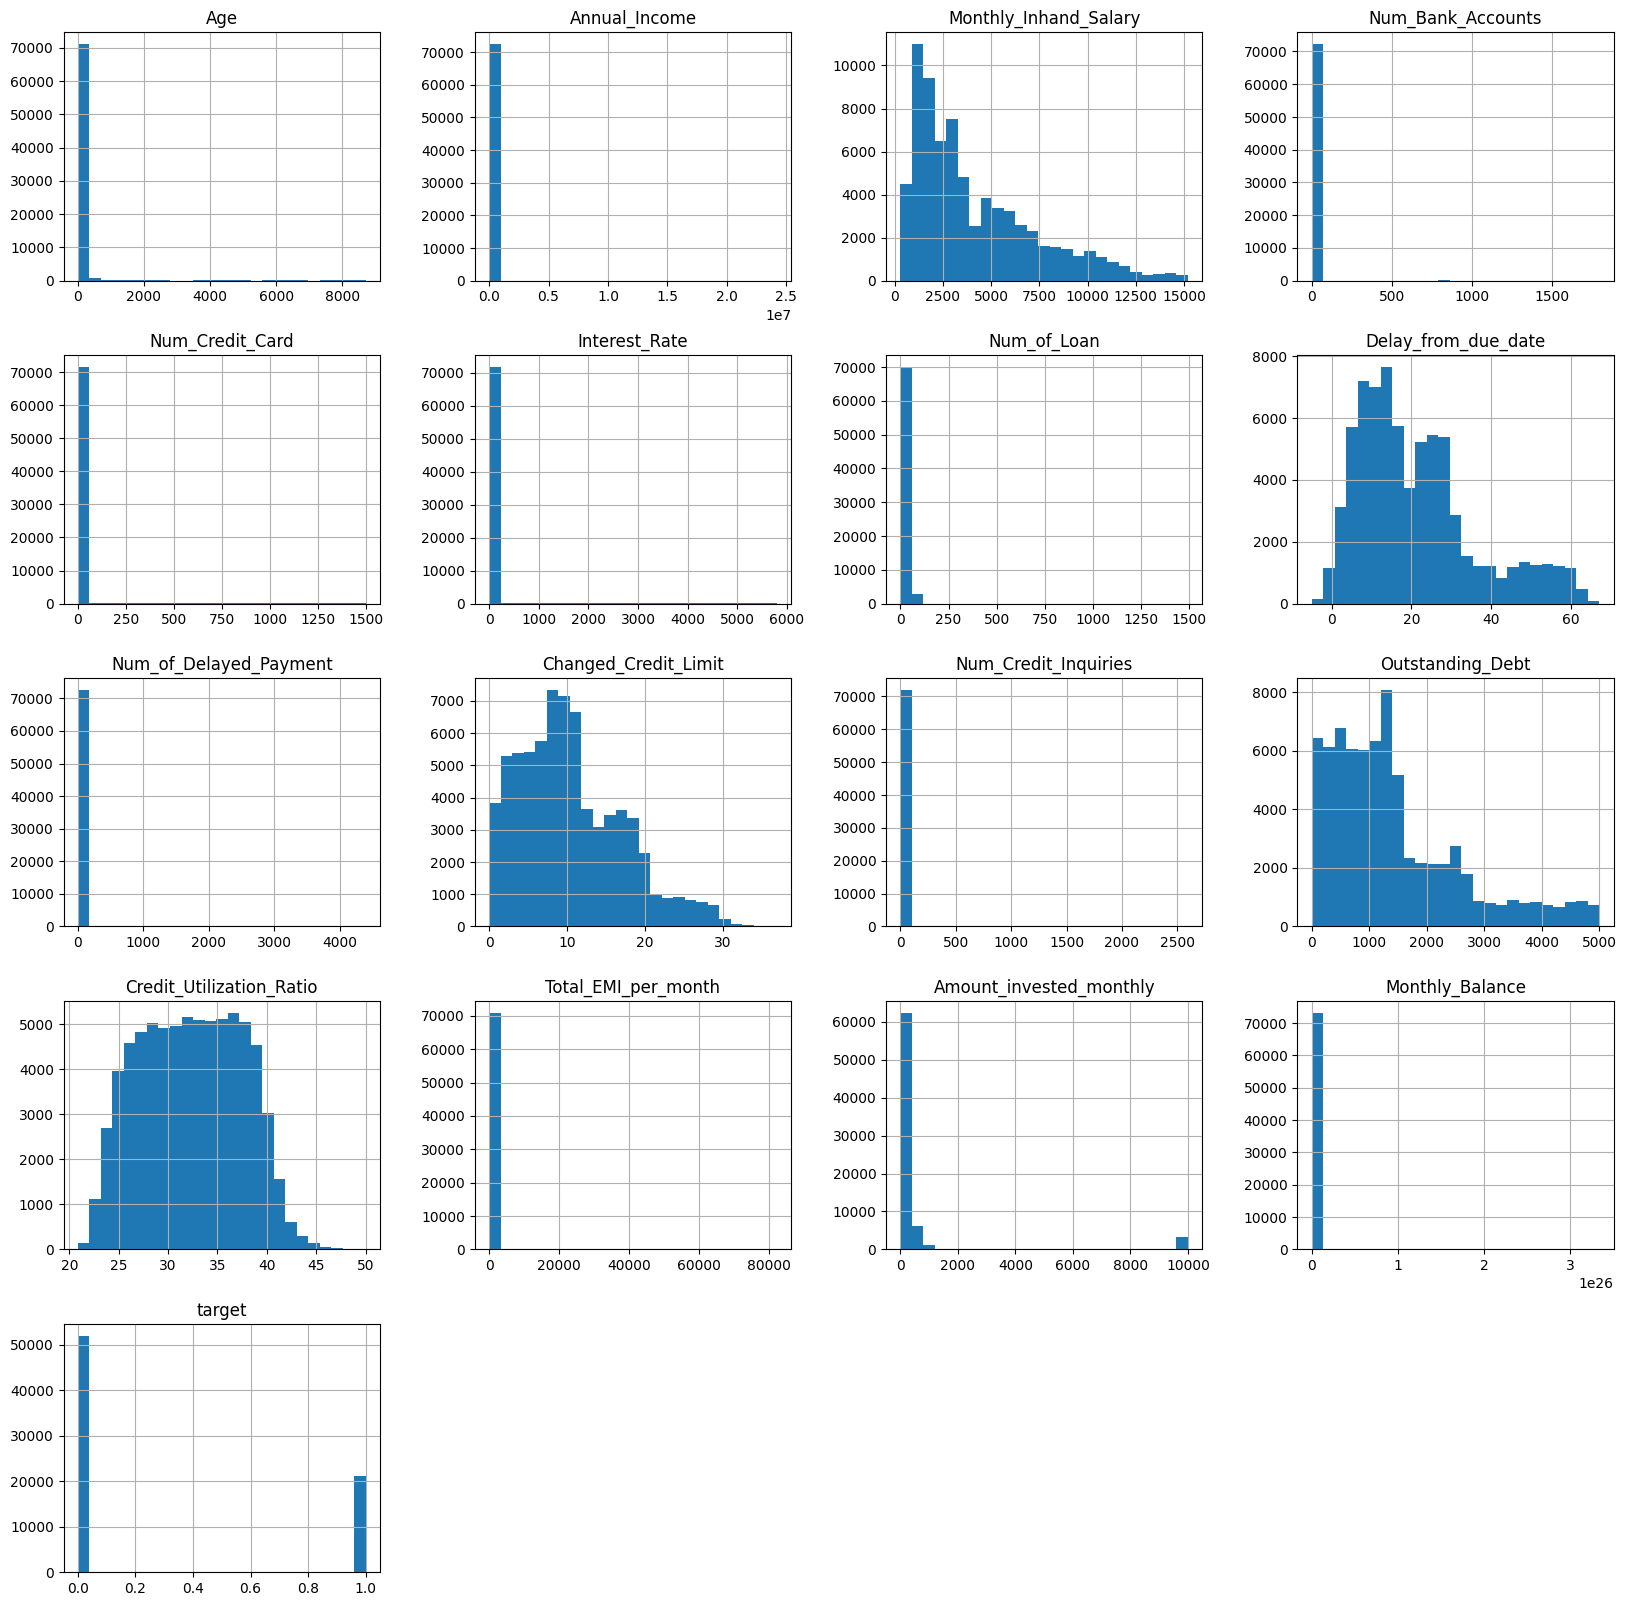

In [54]:
# Plotando as distribuições

df_numericas.hist(figsize=(20,20),bins=25);

### 4.3.2 Analisando o histórico de crédito dos clientes em meses (col `Credit_History_Age`)

📝 Tempo total de histórico de crédito do cliente (em meses)

A variável era categórica (seção 4.2.8). Foi analisada, abaixo, em faixas, após ter sido transformada em meses.

In [55]:
# Ordenação em 5 partes iguais, montando uma "faixa" de meses

credit_hist_age_bins = pd.qcut(Credit_History_Age_Months, q=5)

# Concatenando com o target

df_credit_hist_age = pd.concat([credit_hist_age_bins,train['target']],axis=1)

# Taxa de maus por faixa de histórico de crédito

df_credit_hist_age.groupby(['Credit_History_Age'],observed=True)['target'].mean()

Credit_History_Age
(0.999, 124.0]    0.492707
(124.0, 196.0]    0.442194
(196.0, 243.0]    0.277597
(243.0, 323.0]    0.123161
(323.0, 404.0]    0.111080
Name: target, dtype: float64

Percebe-se que clientes com menor tempo de histórico de crédito (em meses) apresentam uma maior taxa de maus pagadores, o que era esperado. Já os clientes com maior tempo de histórico têm uma taxa de inadimplência menor. Isso faz sentido, pois clientes com mais tempo de crédito tendem a ser mais confiáveis, tornando menos provável o perfil de inadimplência.

### 4.3.3 Analisando a taxa de maus por idade (col `Age`)

📝 Idade do cliente

In [56]:
# Dados ausentes

train['Age'].isna().sum()

np.int64(0)

##### Preparando a variável para ser analisada

In [57]:
age_hist = train['Age']
age_hist = pd.DataFrame(age_hist)

# Removendo underscore _
age_hist.loc[:, 'Age'] = age_hist['Age'].str.replace('_', '', regex=False)

# Transformando em int
age_hist.loc[:,'Age'] = age_hist['Age'].astype(int)

In [58]:
# Maior idade

age_hist['Age'].max()

8698

In [59]:
# Menor idade

age_hist['Age'].min()

-500

Foi percebido que idades menores que zero e maiores que 130 somaram 2.776 linhas. Isso corresponde a 2,77% do total da base (100.000). Esses outliers de idade foram interpretados como erros, por esse motivo, serão substituídos inicialmente como dados nulos para posteriores transformações na próxima etapa do projeto.

In [60]:
print(f'Total de linhas com outliers: {age_hist[(age_hist['Age'] < 0) | (age_hist['Age'] > 100)].shape[0]}')

Total de linhas com outliers: 2776


In [61]:
# Transformando idades < 0 e > 130 anos em NaN

age_hist.loc[(age_hist['Age'] < 0) | (age_hist['Age'] > 100), 'Age'] = np.nan

##### Análise da variável

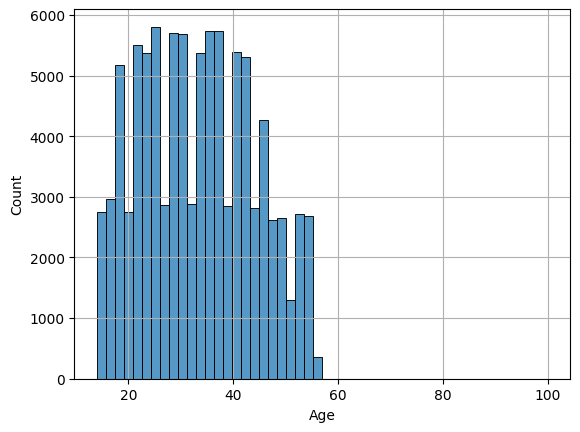

In [62]:
# Distribuição de idades

sns.histplot(data=age_hist, x='Age',bins=50)
plt.grid()

Percebe-se acima que a distribuição de idade não está muito simétrica e uniforme.

In [63]:
age_hist_series = age_hist['Age']

In [64]:
# Ordenação em 5 partes iguais, montando uma "faixa" de idades

age_bins = pd.qcut(age_hist_series, q=5)

# Concatenando com o target

df_age = pd.concat([age_bins,train['target']],axis=1)

# Taxa de maus por faixa de histórico de crédito

df_age.groupby(['Age'],observed=True)['target'].mean()

Age
(13.999, 23.0]    0.334953
(23.0, 30.0]      0.314496
(30.0, 36.0]      0.299755
(36.0, 43.0]      0.309740
(43.0, 100.0]     0.173671
Name: target, dtype: float64

Analisando a variável de idade acima, percebeu-se que quanto menor a idade, maior a taxa de maus pagadores, enquanto com indivíduos de uma maior faixa de idade essa taxa é menor. Esse comportamento é comum na área de crédito, sugerindo que pessoas mais jovens podem ter um histórico de crédito mais instável em comparação com indivíduos de idade mais avançada. A diferença percentual entre a menor e a maior taxa foi de 16%.

### 4.3.4 Analisando a renda anual (col `Annual_Income`)

📝 Renda anual do cliente

In [65]:
# Dados ausentes

train['Annual_Income'].isna().sum()

np.int64(0)

In [66]:
annual_income = train[['Annual_Income','target']]

# Removendo underscore _
annual_income.loc[:,'Annual_Income'] = annual_income.loc[:,'Annual_Income'].str.replace('_', '', regex=False)

# Transformando em float
annual_income.loc[:,'Annual_Income'] = annual_income['Annual_Income'].astype(float)

In [67]:
# Ordenação em 10 partes iguais, montando uma "faixa" de rendas

annual_income_bins = pd.qcut(annual_income['Annual_Income'], q=10)

# Concatenando com o target

df_annual_income = pd.concat([annual_income_bins,annual_income['target']],axis=1)

# Taxa de maus por faixa de histórico de crédito

df_annual_income.groupby(['Annual_Income'],observed=True)['target'].mean()

Annual_Income
(7005.929, 14293.345]      0.419274
(14293.345, 17642.1]       0.404379
(17642.1, 21338.55]        0.409841
(21338.55, 31225.44]       0.164233
(31225.44, 37578.61]       0.247800
(37578.61, 49661.1]        0.325002
(49661.1, 64915.92]        0.373637
(64915.92, 82334.016]      0.274637
(82334.016, 113085.87]     0.125712
(113085.87, 24198062.0]    0.155209
Name: target, dtype: float64

Observou-se, acima, que a taxa de maus pagadores é maior entre clientes com renda anual mais baixa, algo que faz sentido, pois sabe-se que pessoas com renda menor possuem uma maior probabilidade de atrasos ou inadimplência em pagamentos. Por outro lado, foi possível ver que os clientes com renda mais alta obtiveram uma taxa de maus pagadores menor. A diferença percentual foi de 21,41%.

### 4.3.5 Analisando a variável de salário mensal (col `Monthly_Inhand_Salary`)

📝 Salário mensal do cliente

In [68]:
# Dados ausentes

train['Monthly_Inhand_Salary'].isna().sum()

np.int64(15002)

In [69]:
# Ordenação em 5 partes iguais, montando uma "faixa" de salários

monthly_inhand_salary = pd.qcut(train['Monthly_Inhand_Salary'], q=5)

# Concatenando com o target

df_monthly_inhand_salary = pd.concat([monthly_inhand_salary,train['target']],axis=1)

# Taxa de maus por faixa de salário mensal

df_monthly_inhand_salary.groupby(['Monthly_Inhand_Salary'],observed=True)['target'].mean()

Monthly_Inhand_Salary
(303.644, 1468.065]     0.413854
(1468.065, 2559.818]    0.286261
(2559.818, 4039.538]    0.281640
(4039.538, 6710.36]     0.327508
(6710.36, 15204.633]    0.140193
Name: target, dtype: float64

Como o esperado, pessoas com a faixa salarial menor estão categorizados com a maior taxa de maus pagadores. Enquanto os de maior renda posuem a menor taxa, com uma diferença percentual de 27%.

### 4.3.6 Analisando a variável de total de contas bancárias (col `Num_Bank_Accounts`)

📝 Número de contas bancárias que o cliente possui

In [70]:
# Dados ausentes

train['Num_Bank_Accounts'].isna().sum()

np.int64(0)

##### Preparando a variável para ser analisada

In [71]:
train['Num_Bank_Accounts'].describe()

count    100000.000000
mean         17.091280
std         117.404834
min          -1.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64

In [72]:
# Verificando os 1% mais discrepantes (ponto de corte para o outlier)

np.percentile(train['Num_Bank_Accounts'],q=99)

np.float64(445.00999999999476)

Foi percebido que a variável possui outliers. O valor mínimo de contas bancárias está registrado como -1, enquanto o máximo corresponde a 1798. Esses valores parecem inválidos.

In [73]:
num_bank_accounts = train['Num_Bank_Accounts']
num_bank_accounts = pd.DataFrame(num_bank_accounts)

In [74]:
print(f'Total de linhas com outliers: {num_bank_accounts[(num_bank_accounts['Num_Bank_Accounts'] < 0) | (num_bank_accounts['Num_Bank_Accounts'] > 445)].shape[0]}')

Total de linhas com outliers: 1021


Foi percebido que o total de contas bancárias menores que zero e maiores que 445 somaram 1.021 linhas. Isso corresponde a 1,02% do total da base (100.000). Esses outliers foram interpretados como erros, por esse motivo, serão substituídos inicialmente como dados nulos para posteriores transformações na próxima etapa do projeto.

In [75]:
# Transformando número de contas bancárias < 0 e > 445 em NaN

num_bank_accounts.loc[(num_bank_accounts['Num_Bank_Accounts'] < 0) | (num_bank_accounts['Num_Bank_Accounts'] > 445),
'Num_Bank_Accounts'] = np.nan

##### Análise da variável

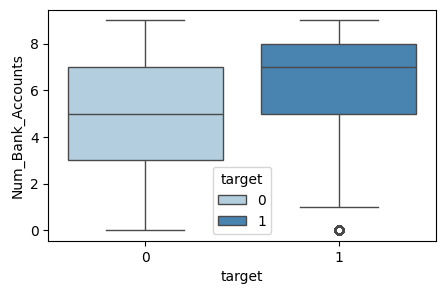

In [76]:
num_bank_accounts_box_plot = num_bank_accounts
num_bank_accounts_box_plot = pd.concat([num_bank_accounts_box_plot,train['target']],axis=1)
num_bank_accounts_box_plot_filter = num_bank_accounts_box_plot.loc[num_bank_accounts_box_plot['Num_Bank_Accounts'] < 10]

plt.figure(figsize=(5,3))
sns.boxplot(x='target',y='Num_Bank_Accounts', data=num_bank_accounts_box_plot_filter,hue='target', palette='Blues')
plt.show()

O grupo com mais contas bancárias (target = 1) apresenta uma concentração em maior quantidade de contas bancárias, enquanto o grupo com menos contas (target = 0) tem uma distribuição mais ampla e mediana menor. Isso sugere que um número maior de contas bancárias está associado a uma maior taxa maus pagadores.

In [77]:
# Ordenação em 5 partes iguais, montando uma "faixa" de quantidades de contas bancárias

num_bank_accounts = pd.qcut(num_bank_accounts['Num_Bank_Accounts'], q=5)

# Concatenando com o target

df_num_bank_accounts = pd.concat([num_bank_accounts,train['target']],axis=1)

# Taxa de maus por faixa de quantidades de contas bancárias

df_num_bank_accounts.groupby(['Num_Bank_Accounts'],observed=True)['target'].mean()

Num_Bank_Accounts
(-0.001, 3.0]    0.158145
(3.0, 5.0]       0.160097
(5.0, 6.0]       0.358819
(6.0, 8.0]       0.368454
(8.0, 445.0]     0.611676
Name: target, dtype: float64

Percebeu-se, acima, que a taxa de maus pagadores é maior em indivíduos com maior quantidade de contas bancárias, enquanto a taxa de maus é menor em indivíduos com menor quantidade de contas bancárias. Isso faz algum sentido, pois indivíduos sem um credit score bom podem tentar obter crédito em vários tipos de contas diferentes. A diferença percentual é de 46%.

### 4.3.7 Analisando a variável de total de cartões de crédito (col `Num_Credit_Card`)

📝 Número de cartões de crédito que o cliente possui

In [78]:
# Dados ausentes

train['Num_Credit_Card'].isna().sum()

np.int64(0)

In [79]:
train['Num_Credit_Card'].describe()

count    100000.00000
mean         22.47443
std         129.05741
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max        1499.00000
Name: Num_Credit_Card, dtype: float64

Percebe-se, acima, que a quantidade máxima de cartões também segue um padrão de valores discrepantes, dessa vez apenas com valores muito acima do padrão dos dados observados acima. A quantidade máxima de cartões totalizou em 1499, valor 21371,43% acima do terceiro quartil (75%) dos dados.

In [80]:
# Verificando os 10% mais discrepantes (ponto de corte para o outlier)

np.percentile(train['Num_Credit_Card'],q=99)

np.float64(849.0)

In [81]:
num_credit_card = train['Num_Credit_Card']
num_credit_card = pd.DataFrame(num_credit_card)

In [82]:
print(f'Total de linhas com outliers: {num_credit_card[(num_credit_card['Num_Credit_Card'] > 849)].shape[0]}')

Total de linhas com outliers: 994


Foi percebido que o total de cartões de crédito maiores que 849 somaram 994 linhas. Isso corresponde a 0,99% do total da base (100.000). Esses outliers foram interpretados como erros, por esse motivo, serão substituídos inicialmente como dados nulos para posteriores transformações na próxima etapa do projeto, assim como nas variáveis `Age`e `Num_Bank_Accounts`.

In [83]:
# Transformando número de contas bancárias < 0 e > 445 em NaN

num_credit_card.loc[num_credit_card['Num_Credit_Card'] > 849,'Num_Credit_Card'] = np.nan

##### Análise da variável

In [84]:
# Ordenação em 5 partes iguais, montando uma "faixa" de salários

num_credit_card = pd.qcut(num_credit_card['Num_Credit_Card'], q=5)

# Concatenando com o target

df_num_credit_card = pd.concat([num_credit_card, train['target']], axis=1)

# Taxa de maus por número de cartão de crédito

df_num_credit_card.groupby('Num_Credit_Card',observed=True)['target'].mean()

Num_Credit_Card
(-0.001, 4.0]    0.121705
(4.0, 5.0]       0.282626
(5.0, 6.0]       0.302736
(6.0, 7.0]       0.311586
(7.0, 849.0]     0.598529
Name: target, dtype: float64

Seguindo a mesma lógica da análise anterior, quanto maior a quantidade de cartões de crédito, percebe-se uma maior taxa de maus pagadores e quanto menor a quantidade, menor a taxa de maus pagadores. A diferença percentual é de 47%.

### 4.3.8 Analisando a variável de taxa de juros (col `Interest_Rate`)

📝 Taxa de juros aplcada aos empréstimos ou dívidas

In [85]:
# Dados ausentes

train['Interest_Rate'].isna().sum()

np.int64(0)

In [86]:
# Ordenação em 10 partes iguais, montando uma "faixa" de juros

interest_rate = pd.qcut(train['Interest_Rate'], q=5)

# Concatenando com o target

df_interest_rate = pd.concat([interest_rate, train['target']], axis=1)

# Taxa de maus por taxa de juros aplicada aos empréstimos/dívidas

df_interest_rate.groupby('Interest_Rate',observed=True)['target'].mean()

Interest_Rate
(0.999, 6.0]      0.135828
(6.0, 11.0]       0.131923
(11.0, 16.0]      0.186726
(16.0, 23.0]      0.404560
(23.0, 5797.0]    0.604826
Name: target, dtype: float64

Percebeu-se que o grupo com maior taxa de juros possui uma maior taxa de maus pagadores e vice-versa. A diferença percentual da menor para a maior taxa de maus pagadores foi de 47%.

### 4.3.9 Analisando os empréstimos (col `Num_of_Loan`)

📝 Número de empréstimos que o cliente possui

In [87]:
# Dados ausentes

train['Num_of_Loan'].isna().sum()

np.int64(0)

In [88]:
num_of_loan = train['Num_of_Loan']
num_of_loan = pd.DataFrame(num_of_loan)

# Removendo underscore _
num_of_loan.loc[:, 'Num_of_Loan'] = num_of_loan['Num_of_Loan'].str.replace('_', '', regex=False)

# Transformando em int
num_of_loan.loc[:,'Num_of_Loan'] = num_of_loan['Num_of_Loan'].astype(int)

In [89]:
num_of_loan['Num_of_Loan'].max()

1496

In [90]:
num_of_loan['Num_of_Loan'].min()

-100

In [91]:
num_of_loan['Num_of_Loan'].describe()

count     100000
unique       414
top            3
freq       15104
Name: Num_of_Loan, dtype: int64

In [92]:
# Escolhendo o valor com base nos 1% mais discrepantes

np.percentile(num_of_loan['Num_of_Loan'],q=99)

np.float64(9.0)

In [93]:
num_of_loan.loc[(num_of_loan['Num_of_Loan'] < 0) | (num_of_loan['Num_of_Loan'] > 9), 'Num_of_Loan'] = np.nan

##### Análise da variável

In [94]:
# Ordenação em 5 partes iguais, montando uma "faixa" de empréstimos

num_of_loan = pd.qcut(num_of_loan['Num_of_Loan'], q=5)

# Concatenando com o target

df_num_credit_card = pd.concat([num_of_loan, train['target']], axis=1)

# Taxa de maus por número de cartão de crédito

df_num_credit_card.groupby('Num_of_Loan',observed=True)['target'].mean()

Num_of_Loan
(-0.001, 1.0]    0.143077
(1.0, 3.0]       0.238027
(3.0, 4.0]       0.235405
(4.0, 6.0]       0.512774
(6.0, 9.0]       0.532934
Name: target, dtype: float64

Percebeu-se que a taxa de inadimplentes é maior em clientes que pedem mais empréstimos, enquanto é menor em clientes que pedem menos. A diferença percentual dos grupos foi de 39%.

### 4.3.10 Analisando os atrasos de pagamento em dias (col `Delay_from_due_date`)

📝 Atraso em dias no pagamento após a data de vencimento

⚠️ É possível que a variável seja um vazamento para o modelo, pois pode ter sido referência para construir o target. Por esse motivo, optou-se por não considerá-la no modelo.

In [95]:
# Dados ausentes

train['Delay_from_due_date'].isna().sum()

np.int64(0)

In [96]:
train['Delay_from_due_date'].describe()

count    100000.000000
mean         21.068780
std          14.860104
min          -5.000000
25%          10.000000
50%          18.000000
75%          28.000000
max          67.000000
Name: Delay_from_due_date, dtype: float64

In [97]:
# Ordenação em 5 partes iguais, montando uma "faixa" de dias de ataso

delay_from_due_date = pd.qcut(train['Delay_from_due_date'], q=5)

# Concatenando com o target

df_delay_from_due_date = pd.concat([delay_from_due_date, train['target']], axis=1)

# Taxa de maus por número de cartão de crédito

df_delay_from_due_date.groupby('Delay_from_due_date',observed=True)['target'].mean()

Delay_from_due_date
(-5.001, 8.0]    0.116753
(8.0, 14.0]      0.146061
(14.0, 22.0]     0.287992
(22.0, 30.0]     0.302499
(30.0, 67.0]     0.613565
Name: target, dtype: float64

Como o esperado, é possível ver que quanto maior o tempo de atraso, maior a taxa de maus pagadores. A diferença percentual foi de 50%.

### 4.3.11 Analisando o total de atrasos de pagamento (col `Num_of_Delayed_Payment`)

📝 Número de pagamentos atrasados

⚠️ É possível que a variável seja um vazamento para o modelo, pois pode ter sido referência para construir o target. Por esse motivo, optou-se por não considerá-la no modelo.

In [98]:
# Dados ausentes

train['Num_of_Delayed_Payment'].isna().sum()

np.int64(7002)

In [99]:
train['Num_of_Delayed_Payment'].describe()

count     92998
unique      749
top          19
freq       5327
Name: Num_of_Delayed_Payment, dtype: object

In [100]:
num_of_delayed_payment = train['Num_of_Delayed_Payment']
num_of_delayed_payment = pd.DataFrame(num_of_delayed_payment)

# Removendo underscore _
num_of_delayed_payment.loc[:, 'Num_of_Delayed_Payment'] = num_of_delayed_payment['Num_of_Delayed_Payment'].str.replace('_', '', regex=False)

# Remoção dos NaN
num_of_delayed_payment = num_of_delayed_payment.dropna()

# Transformando em int
num_of_delayed_payment['Num_of_Delayed_Payment'] = num_of_delayed_payment['Num_of_Delayed_Payment'].astype(int)

In [101]:
# Ordenação em 5 partes iguais, montando uma "faixa" de total de atrasos

num_of_delayed_payment = pd.qcut(num_of_delayed_payment['Num_of_Delayed_Payment'], q=5)

# Concatenando com o target

df_num_of_delayed_payment = pd.concat([num_of_delayed_payment, train['target']], axis=1)

# Taxa de maus por número de cartão de crédito

df_num_of_delayed_payment.groupby('Num_of_Delayed_Payment',observed=True)['target'].mean()

Num_of_Delayed_Payment
(-3.001, 8.0]     0.167140
(8.0, 12.0]       0.201498
(12.0, 16.0]      0.279796
(16.0, 19.0]      0.357316
(19.0, 4397.0]    0.498811
Name: target, dtype: float64

Como o esperado, é possível ver que quanto maior o tempo de atraso, maior a taxa de maus pagadores. A diferença percentual foi de 33%.

### 4.3.12 Analisando as alterações do limite (col `Changed_Credit_Limit`)

📝 Alteração no limite de crédito

In [102]:
# Dados ausentes

train['Changed_Credit_Limit'].isna().sum()

np.int64(0)

In [103]:
changed_credit_limit = train['Changed_Credit_Limit']
changed_credit_limit = pd.DataFrame(changed_credit_limit)

# Removendo underscore _
changed_credit_limit.loc[:, 'Changed_Credit_Limit'] = changed_credit_limit['Changed_Credit_Limit'].str.replace('_', '', regex=False)

# Transformando espaços vazios em nans
changed_credit_limit['Changed_Credit_Limit'] = changed_credit_limit['Changed_Credit_Limit'].replace('', np.nan)

# Convertendo pra float
changed_credit_limit['Changed_Credit_Limit'] = changed_credit_limit['Changed_Credit_Limit'].astype(float) 

In [104]:
# Ordenação em 5 partes iguais, montando uma "faixa" de alterações de crédito

changed_credit_limit = pd.qcut(changed_credit_limit['Changed_Credit_Limit'], q=5)

# Concatenando com o target

changed_credit_limit = pd.concat([changed_credit_limit, train['target']], axis=1)

# Taxa de maus por número de cartão de crédito

changed_credit_limit.groupby('Changed_Credit_Limit',observed=True)['target'].mean()

Changed_Credit_Limit
(-6.4910000000000005, 4.32]    0.268178
(4.32, 7.98]                   0.279010
(7.98, 10.99]                  0.275576
(10.99, 16.38]                 0.275475
(16.38, 36.97]                 0.350125
Name: target, dtype: float64

Percebeu-se que a taxa de maus pagadores é um pouco maior em indivíduos com mais alterações de limite de crédito. A diferença entre o menor e o maior grupo de alterações foi de 9%.

### 4.3.13 Analisando as consultas de crédito (col `Num_Credit_Inquiries`)

📝 Número de consultas de crédito feitas por instituições

In [105]:
# Dados ausentes

train['Num_Credit_Inquiries'].isna().sum()

np.int64(1965)

In [106]:
num_credit_inquiries = train['Num_Credit_Inquiries']
num_credit_inquiries = pd.DataFrame(num_credit_inquiries)

In [107]:
# Ordenação em 5 partes iguais, montando uma "faixa" de consultas de crédito

num_credit_inquiries = pd.qcut(num_credit_inquiries['Num_Credit_Inquiries'], q=5)

# Concatenando com o target

num_credit_inquiries = pd.concat([num_credit_inquiries, train['target']], axis=1)

# Taxa de maus por número de cartão de crédito

num_credit_inquiries.groupby('Num_Credit_Inquiries',observed=True)['target'].mean()

Num_Credit_Inquiries
(-0.001, 2.0]     0.121525
(2.0, 4.0]        0.114776
(4.0, 7.0]        0.285427
(7.0, 10.0]       0.461266
(10.0, 2597.0]    0.573440
Name: target, dtype: float64

Percebeu-se que quanto maior o número de consultas de crédito feitas por instituições, maior a taxa de maus pagadores, o contrário segue a mesma lógica, quanto menor as consultas, menor a taxa de inadimplentes. A diferença entre os grupos extremos foi de 45%.

### 4.3.14 Analisando as dívidas dos clientes (col `Outstanding_Debt`)

📝 Dívida pendente do cliente

In [108]:
# Dados ausentes

train['Outstanding_Debt'].isna().sum()

np.int64(0)

In [109]:
outstanding_debit = train['Outstanding_Debt']
outstanding_debit = pd.DataFrame(outstanding_debit)

# Removendo underscore _
outstanding_debit.loc[:, 'Outstanding_Debt'] = outstanding_debit['Outstanding_Debt'].str.replace('_', '', regex=False)

# Transformando em float e dataframe
outstanding_debit = outstanding_debit['Outstanding_Debt'].astype(float)
outstanding_debit = pd.DataFrame(outstanding_debit)

In [110]:
outstanding_debit.describe()

,Outstanding_Debt
count,100000.000000
mean,1426.220376
std,1155.129026
min,0.230000
25%,566.072500
50%,1166.155000
75%,1945.962500
max,4998.070000


In [111]:
# Ordenação em 5 partes iguais, montando uma "faixa" de quantias investidas

outstanding_debit = pd.qcut(outstanding_debit['Outstanding_Debt'], q=5)

# Concatenando com o target

df_outstanding_debit = pd.concat([outstanding_debit, train['target']], axis=1)

# Taxa de maus por número de cartão de crédito

df_outstanding_debit.groupby('Outstanding_Debt',observed=True)['target'].mean()

Outstanding_Debt
(0.229, 458.272]       0.10320
(458.272, 924.0]       0.10990
(924.0, 1354.338]      0.15965
(1354.338, 2297.28]    0.52945
(2297.28, 4998.07]     0.54770
Name: target, dtype: float64

Perebe-se que clientes com maior dívida possuem uma maior taxa de inadimplentes, algo também esperado. A diferença entre os grupos com menor e maior taxa encontram-se com 44% de diferença.

### 4.3.15 Analisando o crédito disponível (col `Credit_Utilization_Ratio`)

📝 Proporção da utilização do crédito disponível

In [112]:
# Dados ausentes

train['Credit_Utilization_Ratio'].isna().sum()

np.int64(0)

In [113]:
train['Credit_Utilization_Ratio'].describe()

count    100000.000000
mean         32.285173
std           5.116875
min          20.000000
25%          28.052567
50%          32.305784
75%          36.496663
max          50.000000
Name: Credit_Utilization_Ratio, dtype: float64

In [114]:
# Ordenação em 5 partes iguais, montando uma "faixa" de valor das parcelas

credit_utilization_ratio = pd.qcut(train['Credit_Utilization_Ratio'], q=5)

# Concatenando com o target

df_credit_utilization_ratio = pd.concat([credit_utilization_ratio, train['target']], axis=1)

# Taxa de maus por número de cartão de crédito

df_credit_utilization_ratio.groupby('Credit_Utilization_Ratio',observed=True)['target'].mean()

Credit_Utilization_Ratio
(19.999, 27.178]    0.31430
(27.178, 30.619]    0.29105
(30.619, 33.98]     0.28910
(33.98, 37.317]     0.29180
(37.317, 50.0]      0.26365
Name: target, dtype: float64

Pessoas com mais crédito disponível obtiveram a menor taxa de inadimplência. A diferença entre os grupos foi de apenas 5%.

### 4.3.16 Analisando as parcelas mensais (col `Total_EMI_per_month`)

📝 Valor da parcela paga todos os meses para um empréstimo ou financiamento

In [115]:
# Dados ausentes

train['Total_EMI_per_month'].isna().sum()

np.int64(0)

In [116]:
train['Total_EMI_per_month'].describe()

count    100000.000000
mean       1403.118217
std        8306.041270
min           0.000000
25%          30.306660
50%          69.249473
75%         161.224249
max       82331.000000
Name: Total_EMI_per_month, dtype: float64

In [117]:
# Ordenação em 5 partes iguais, montando uma "faixa" de valor das parcelas

total_emi_per_month = pd.qcut(train['Total_EMI_per_month'], q=5)

# Concatenando com o target

df_total_emi_per_month = pd.concat([total_emi_per_month, train['target']], axis=1)

# Taxa de maus por número de cartão de crédito

df_total_emi_per_month.groupby('Total_EMI_per_month',observed=True)['target'].mean()

Total_EMI_per_month
(-0.001, 23.543]      0.183323
(23.543, 52.449]      0.313266
(52.449, 93.669]      0.317518
(93.669, 190.642]     0.327199
(190.642, 82331.0]    0.308615
Name: target, dtype: float64

Pessoas com parcelas de menor valor possuem a menor taxa de inadimplentes. A diferença entre os grupos extremos foi de 12%.

### 4.3.17 Analisando quantia investida (col `Amount_invested_monthly`)

📝 Quantia investida mensalmente pelo cliente

In [118]:
# Dados ausentes

train['Amount_invested_monthly'].isna().sum()

np.int64(4479)

In [119]:
amount_invested_monthly = train['Amount_invested_monthly']
amount_invested_monthly = pd.DataFrame(amount_invested_monthly)

# Removendo underscore _
amount_invested_monthly.loc[:, 'Amount_invested_monthly'] = amount_invested_monthly['Amount_invested_monthly'].str.replace('_', '', regex=False)

# Transformando em float
amount_invested_monthly = pd.to_numeric(amount_invested_monthly['Amount_invested_monthly'], errors='coerce')
amount_invested_monthly = pd.DataFrame(amount_invested_monthly)

In [120]:
# Ordenação em 5 partes iguais, montando uma "faixa" de quantias investidas

amount_invested_monthly = pd.qcut(amount_invested_monthly['Amount_invested_monthly'], q=5)

# Concatenando com o target

df_amount_invested_monthly = pd.concat([amount_invested_monthly, train['target']], axis=1)

# Taxa de maus por número de cartão de crédito

df_amount_invested_monthly.groupby('Amount_invested_monthly',observed=True)['target'].mean()

Amount_invested_monthly
(-0.001, 64.395]      0.335410
(64.395, 108.56]      0.321660
(108.56, 171.259]     0.306114
(171.259, 323.644]    0.264081
(323.644, 10000.0]    0.220896
Name: target, dtype: float64

Clientes que  investem mais dinheiro possuem uma menor taxa de inadimplentes. A diferença dos grupos extremos foi de 11%.

### 4.3.18 Analisando o saldo mensal disponível (col `Monthly_Balance`)

📝 Saldo mensal disponível após todas as despesas.

In [121]:
# Dados ausentes

train['Monthly_Balance'].isna().sum()

np.int64(1200)

In [122]:
monthly_balance = train['Monthly_Balance']
monthly_balance = pd.DataFrame(monthly_balance)

# Transformando em float
monthly_balance = pd.to_numeric(monthly_balance['Monthly_Balance'], errors='coerce')
monthly_balance = pd.DataFrame(monthly_balance)

In [123]:
monthly_balance.describe()

,Monthly_Balance
count,98791.000000
mean,402.551258
std,213.925499
min,0.007760
25%,270.106630
50%,336.731225
75%,470.262938
max,1602.040519


In [124]:
# Ordenação em 5 partes iguais, montando uma "faixa" de quantias investidas

monthly_balance = pd.qcut(monthly_balance['Monthly_Balance'], q=5)

# Concatenando com o target

df_monthly_balance = pd.concat([monthly_balance, train['target']], axis=1)

# Taxa de maus por número de cartão de crédito

df_monthly_balance.groupby('Monthly_Balance',observed=True)['target'].mean()

Monthly_Balance
(0.00676, 257.191]    0.393795
(257.191, 307.002]    0.382933
(307.002, 375.95]     0.281709
(375.95, 523.98]      0.233374
(523.98, 1602.041]    0.158214
Name: target, dtype: float64

Clientes com mais saldo disponível após todas as despesas apresentaram uma menor taxa de inadimplentes. A diferença entre a menor e maior faixa foi de 24%.